True positions: 50.0
Noisy measurements: [ 1.49671415  1.8617357   3.64768854  5.52302986  4.76584663  5.76586304
  8.57921282  8.76743473  8.53052561 10.54256004 10.53658231 11.53427025
 13.24196227 12.08671976 13.27508217 15.43771247 15.98716888 18.31424733
 18.09197592 18.5876963  22.46564877 21.7742237  23.0675282  22.57525181
 24.45561728 26.11092259 25.84900642 28.37569802 28.39936131 29.70830625
 30.39829339 33.85227818 32.98650278 32.94228907 35.82254491 34.77915635
 37.2088636  36.04032988 37.67181395 40.19686124 41.73846658 42.17136828
 42.88435172 43.6988963  43.52147801 45.28015579 46.53936123 49.05712223
 49.34361829 48.23695984]
Estimated positions: [ 0.74836082  1.11949196  1.75156323  2.50590181  2.88259381  3.29454296
  3.95524228  4.49005152  4.89421408  5.40787978  5.83545185  6.27404165
  6.77204139  7.12659299  7.51117133  7.97784868  8.42325206  8.94440846
  9.40235153  9.84034649 10.41508725 10.90977734 11.41726259 11.86445656
 12.34976057 12.86060318 13.32562218

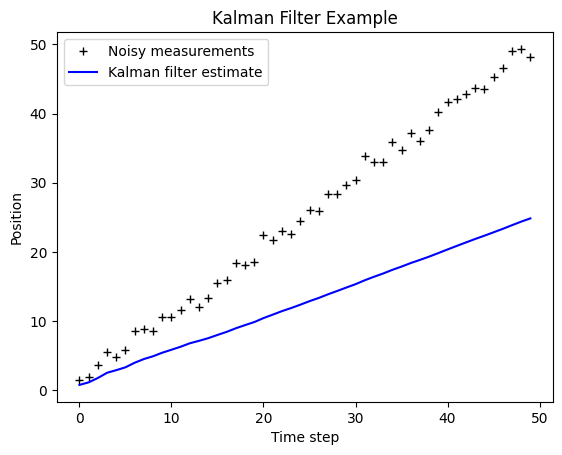

In [1]:
import numpy as np

# Define the initial parameters
n_iter = 50  # Number of iterations
true_position = 0.0  # True initial position
true_velocity = 1.0  # True velocity
measurement_noise = 1.0  # Standard deviation of the measurement noise
process_noise = 1e-5  # Process noise variance

# Initialize arrays for storing results
z = np.zeros(n_iter)  # Observations (noisy measurements)
x = np.zeros(n_iter)  # Estimated position
P = np.zeros(n_iter)  # Estimated error covariance

# Initial estimates
x_est = 0.0  # Initial estimate of position
P_est = 1.0  # Initial estimate of error covariance

# Kalman filter parameters
Q = process_noise  # Process noise variance
R = measurement_noise ** 2  # Measurement noise variance
A = 1  # State transition matrix
H = 1  # Observation matrix

# Generate noisy measurements
np.random.seed(42)  # For reproducibility
for k in range(n_iter):
    true_position += true_velocity
    z[k] = true_position + np.random.normal(0, measurement_noise)

# Run the Kalman filter
for k in range(n_iter):
    # Prediction step
    x_pred = A * x_est
    P_pred = A * P_est * A + Q

    # Update step
    K = P_pred * H / (H * P_pred * H + R)  # Kalman gain
    x_est = x_pred + K * (z[k] - H * x_pred)
    P_est = (1 - K * H) * P_pred

    # Store results
    x[k] = x_est
    P[k] = P_est

# Print results
print("True positions:", true_position)
print("Noisy measurements:", z)
print("Estimated positions:", x)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(z, 'k+', label='Noisy measurements')
plt.plot(x, 'b-', label='Kalman filter estimate')
plt.legend()
plt.title('Kalman Filter Example')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.show()
